In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Import method from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt

# importing all essential libraries 


In [9]:
# Reading the file for breastcancer data set 
print(open('wdbc.names', 'r').read())
df = pd.read_csv('wdbc.data', names = ['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smootheness', 'Compactness', 'Concavity', 'Concave Points', 'Symetry', 'Fractal Dimension', 'RadiusSE', 'TextureSE', 'PerimeterSE', 'AreaSE', 'SmoothenessSE', 'CompactnessSE', 'ConcavitySE', 'Concave PointsSE', 'SymetrySE', 'Fractal DimensionSE','RadiusW', 'TextureW', 'PerimeterW', 'AreaW', 'SmoothenessW', 'CompactnessW', 'ConcavityW', 'Concave PointsW', 'SymetryW', 'Fractal DimensionW'])
df.shape

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

(569, 32)

In [10]:
#Binary Encoding of Diagnosis labels
    #relate the use of Euclidean distance to determine dissimilarity
df['Diagnosis'].replace(['M','B'],[0,1],inplace=True)
#Exclusion of extraneous data
    #Reason...
df = df.drop(['ID'],axis = 1)
df = df.drop(df.iloc[:,11:31], axis = 1)

In [11]:
#Establishing X and y data to train and evaluate model.
#X data is a copy of process raw data. y is a matrix containing diagnosis
X=df
y=df['Diagnosis']

#Chose not to normalize data due to suspicioussly high accuracy
    #X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#Creation of train and test sets utilizing train_test_split.
    #Realte reasoning to overfitting 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)



In [12]:
#k is the number of neighboring data points utilized for prediction
k = 4
#KNeigh is a method of the Sci-Kit Learn library that is fit to the training data
model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

#The trained model is used to predict the diagnosis from the test data.
#the resulting values are the predictions that will be compared to the test data for evaluation.
y_hat = model.predict(X_test)

print(y_hat[0:5])

[1 1 0 0 0]


In [13]:
#accuracty metrics
    #accuracty determined by the fraction of correct predictions
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.9362637362637363
Test set Accuracy:  0.8157894736842105


In [17]:
#determination of best k value by evaluation of statistics on the accuracty of model
k_max = 10
#creation of empty arrays to store mean accuracy and standard deviation values
acc = np.zeros((k_max-1))
std_acc = np.zeros((k_max-1))

for n in range(1,k_max):
    _model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=_model.predict(X_test)
    #calculation and storage of accuracty (method stated above) and standard deviation
    acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

acc


array([0.84210526, 0.80701754, 0.8245614 , 0.81578947, 0.86842105,
       0.84210526, 0.86842105, 0.83333333, 0.84210526])

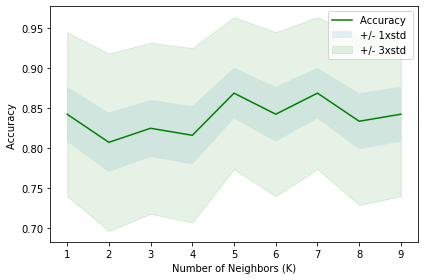

In [18]:
plt.plot(range(1,k_max),acc,'g')
plt.fill_between(range(1,k_max),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,k_max),acc - 3 * std_acc,acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()